In [53]:
# put all your library imports here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from datetime import datetime
import requests
import os

## Functions used in project

In [54]:
def LinePlot(Data_DF):
        # Group the data by country and month, and calculate the average price
    MonthlyPriceDf = Data_DF.groupby(['Country', pd.Grouper(key='Date', freq='M')])['Price (EUR/MWhe)'].mean().reset_index()

    # Pivot the data to have countries as columns and months as rows
    df_pivot = MonthlyPriceDf.pivot(index='Date', columns='Country', values='Price (EUR/MWhe)')

    # Create a line chart
    df_pivot.plot(figsize=(10,6), title='Evolution of Price over Months by Country', xlabel='Month', ylabel='Price (EUR/MWhe)')
    plt.show()

In [55]:
def MergeTwoDataFrame(Data1, Data2):
        # convert date column to datetime format and extract month
    Data1['month'] = Data1['Date'].dt.month
    Data2['month'] = Data2['Date'].dt.month
    Data1['year'] = Data1['Date'].dt.year
    Data2['year'] = Data2['Date'].dt.year

    # merge data frames on month of year using inner join
    merged_df = pd.merge(Data1, Data2, on=['month', 'year'])

    # drop month column
    merged_df.drop(['month', 'year'] , axis=1, inplace=True)
    
    return merged_df

In [56]:
def Corre(data1, data2):
        # Calculate the correlation coefficient
    correlation = np.corrcoef(data1, data2)[0, 1]

    print('Correlation coefficient:', correlation)

In [57]:
def GroupDataYearlyChart(df):
    # Convert the 'Date' column to a pandas datetime object
    df['Date'] = pd.to_datetime(df['Date'])

    # Group the data by year and country, and calculate the average price
    grouped = df.groupby([df['Date'].dt.year, 'Country'])['Price (EUR/MWhe)'].mean()

    # Convert the resulting Series back to a DataFrame
    df_yearly = grouped.reset_index()
    # Create a line plot of the average price over time for each country
    for country in df['Country'].unique():
        df_country = df_yearly[df_yearly['Country'] == country]
        plt.plot(df_country['Date'], df_country['Price (EUR/MWhe)'], label=country)

    plt.xlabel('Year')
    plt.ylabel('Price (EUR/MWhe)')
    plt.title('Yearly Evolution of Price by Country')
    plt.legend()
    plt.show()
    

In [58]:
def MergeTwoDataFrame(Data1, Data2):
        # convert date column to datetime format and extract month
    Data1['month'] = Data1['Date'].dt.month
    Data2['month'] = Data2['Date'].dt.month
    Data1['year'] = Data1['Date'].dt.year
    Data2['year'] = Data2['Date'].dt.year

    # merge data frames on month of year using inner join
    merged_df = pd.merge(Data1, Data2, on=['month', 'year'])

    # drop month column
    merged_df.drop(['month', 'year'] , axis=1, inplace=True)
    
    return merged_df

In [59]:
def PlotPieChart(Data_df):
# group by source of energy and sum the electricity production
    df_grouped = Data_df.groupby('Source of E').sum()
    
    # create a larger figure size
    plt.figure(figsize=(5, 5))
    
    # create a pie chart of the distribution of energy sources
    labels = df_grouped.index
    values = df_grouped['Electricity_MWH']
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    
    # show the plot
    plt.show()

## Descriptive Analysis on Price of Electricity Price DataSet.

In [60]:
ElectricityPrice = pd.read_csv("Storage(DataLate)/WholeSaleElectricityPrice.csv")

In [61]:
DailyElectricityPrice = ElectricityPrice.copy()

In [62]:
DailyElectricityPrice['Date'] = pd.to_datetime(DailyElectricityPrice['Date'])

In [63]:
DailyElectricityPrice.dtypes

Country                     object
ISO3 Code                   object
Date                datetime64[ns]
Price (EUR/MWhe)           float64
dtype: object

In [64]:
ElectricityPrice['Date'] = pd.to_datetime(ElectricityPrice['Date'])

## Exploratory Analysis on Price data set

#### POST COVID 

In [65]:
ElectricityPrice2022_DF = ElectricityPrice[ElectricityPrice['Date'].dt.year >= 2022]

## BELGIUM 

C:\Users\rrond\AppData\Local\Temp\ipykernel_14272\322924489.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  belgium_data = ElectricityPrice2022_DF[(ElectricityPrice['Country'] == 'Belgium')]


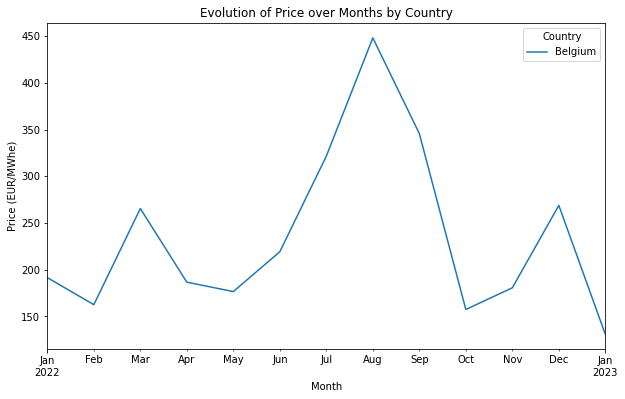

In [66]:
# Filter the data to keep only rows where Country is 'Belgium' and the year is 2022
belgium_data = ElectricityPrice2022_DF[(ElectricityPrice['Country'] == 'Belgium')]
LinePlot(belgium_data)

## DURING COVID

In [67]:
ElectricityPrice20192021_DF = ElectricityPrice.loc[(ElectricityPrice['Date'].dt.year >= 2019) & (ElectricityPrice['Date'].dt.year <= 2021)]

In [68]:
Bel2019 = ElectricityPrice20192021_DF[ElectricityPrice20192021_DF['Country'] == 'Belgium']

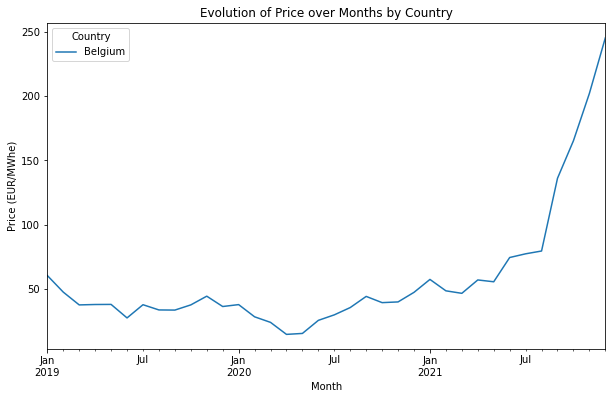

In [69]:
LinePlot(Bel2019)

## PRE COVID

In [70]:
ElectricityPrice20152018_DF = ElectricityPrice.loc[(ElectricityPrice['Date'].dt.year >= 2015) & (ElectricityPrice['Date'].dt.year <= 2018)]

In [71]:
Bel2018 = ElectricityPrice20152018_DF[ElectricityPrice20152018_DF['Country'] == 'Belgium']

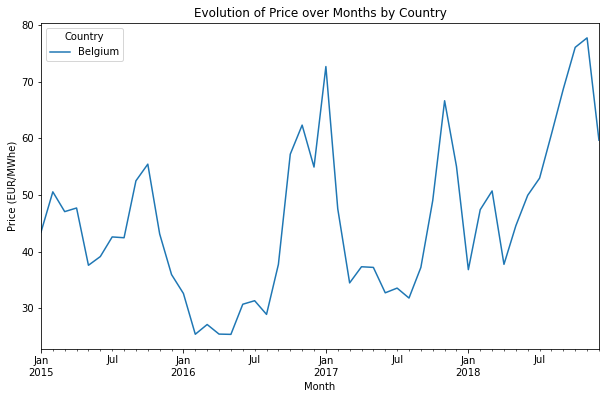

In [72]:
LinePlot(Bel2018)

**INVESTIGATIONS ABOUT THE GRAPH**
For the drop of price of electricity in 2016, A number of factors have been blamed—or praised—for the price slump: the expansion of renewable energy, the collapse of the European emissions trading scheme (EU ETS) allowance price, over-optimistic power plant investments, a decline in final electricity consumption, the decline in fuel prices, and abundant water inflow into hydro reservoirs. Low power plant availability and the German nuclear phase-out, in turn, have helped stabilizing the price.

Source : https://www.strommarkttreffen.org/HirthWhat_caused_the_drop_in_European_electricity_prices.pdf

For increae in average price of electricity in 2019, The electricity futures prices also rose in a generalised way. These increases occurred as a result of the increase in gas and CO2 prices, which reached historical highs, and despite the fact that the wind and solar energy production increased in almost all markets.

Source : https://aleasoft.com/european-electricity-markets-reached-highest-prices-since-at-least-2019-may/

## Natural Gas

Europe has been steadily transitioning towards renewable sources of energy for their electricity generation, making considerable progress over the last decade.
In 2011, fossil fuels (oil, natural gas, and coal) made up 49% of the EU’s electricity production while renewable energy sources only made up 18%. A decade later, renewable energy sources are coming close to equaling fossil fuels, with renewables making up 32% of the EU’s electricity generation compared to fossil fuels’ 36% in 2021.

source : https://www.weforum.org/agenda/2023/02/europe-electricity-renewable-energy-transition/

In [73]:
NaturalGas = pd.read_csv("NaturalGasPriceForEu.csv")

In [74]:
NaturalGas['DATE'] = pd.to_datetime(NaturalGas['DATE'])

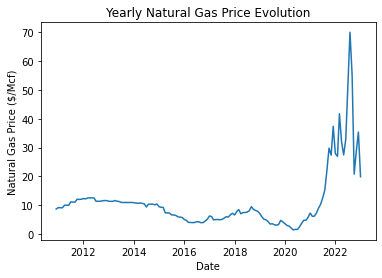

In [75]:
# Create a line plot of natural gas prices over time
plt.plot(NaturalGas['DATE'], NaturalGas['NaturalGasPrice'])
plt.xlabel('Date')
plt.ylabel('Natural Gas Price ($/Mcf)')
plt.title('Yearly Natural Gas Price Evolution')
plt.show()

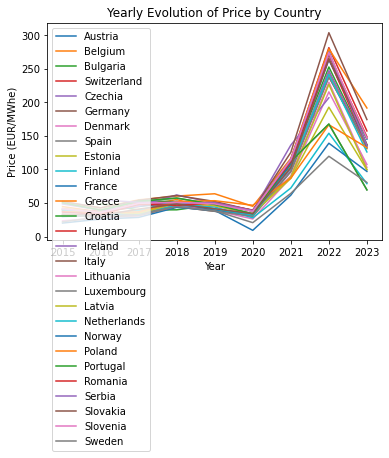

In [76]:
GroupDataYearlyChart(ElectricityPrice)

#### Correlation betweeen the Price of Natural Gas and Price of Electricity¶

In [77]:
# Group the data by year and country, and calculate the average price
ElectricityPriceYear = ElectricityPrice.groupby([ElectricityPrice['Date'].dt.year])['Price (EUR/MWhe)'].mean()

In [78]:
ElectricityPriceYear = ElectricityPriceYear.reset_index()
ElectricityPriceYear["Price (EUR/MWhe)"]

0     37.789825
1     34.543187
2     41.452004
3     50.293954
4     45.319350
5     33.811460
6    101.950298
7    231.935126
8    125.554743
Name: Price (EUR/MWhe), dtype: float64

In [79]:
# Group the data by year, and calculate the average price
NaturalGasPriceYear = NaturalGas.groupby([NaturalGas['DATE'].dt.year])['NaturalGasPrice'].mean()

In [80]:
NaturalGasPriceYear = pd.DataFrame(NaturalGasPriceYear)

In [81]:
NaturalGasPriceYear = NaturalGasPriceYear.loc[(NaturalGasPriceYear.index >= 2015) & (NaturalGasPriceYear.index <= 2023)]

In [82]:
Corre(NaturalGasPriceYear["NaturalGasPrice"], ElectricityPriceYear["Price (EUR/MWhe)"])

Correlation coefficient: 0.9946629109537519


## Monthly Production and Consumption of Electricity

In [83]:
# Read data
Electricitydata_DF = pd.read_csv("BelgiumDeceber.csv")

In [84]:
Electricitydata_DF["Balance"].unique()

array(['Net Electricity Production', 'Total Imports', 'Total Exports',
       'Used for pumped storage', 'Distribution Losses',
       'Final Consumption (Calculated)'], dtype=object)

In [85]:
Electricitydata_DF["Product"].unique()

array(['Electricity', 'Nuclear', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables',
       'Other Combustible Non-Renewables', 'Hydro', 'Wind', 'Solar',
       'Not Specified', 'Total Renewables (Geo, Solar, Wind, Other)'],
      dtype=object)

#### Converting date column to Datetime datatype

In [86]:
# Define the input and output date formats
input_format = '%b-%y'

output_format = '%Y-%m-%d'

# Convert the "Date_y" column to the output format
Electricitydata_DF['Time'] = Electricitydata_DF['Time'].apply(lambda x: datetime.strptime(x, input_format).strftime(output_format))


In [87]:
# Convert the Time column to datetime format
Electricitydata_DF['Time'] = pd.to_datetime(Electricitydata_DF['Time'])

# Print the filtered data

In [88]:
# Reset the index of the DataFrame
Electricitydata_DF = Electricitydata_DF.reset_index()

## Renaming of Columns

In [89]:
# rename multiple columns
Electricitydata_DF = Electricitydata_DF.rename(columns={'Time': 'Date', 'Balance': 'Consumption_Production', 'Product': 'Source of E', 'Value': 'Electricity_MWH'})

In [90]:
Electricitydata_DF["Electricity_MWH"] = Electricitydata_DF["Electricity_MWH"] * 1000

In [91]:
### CONVERT THE VALUE IN megawatt and rename all columns 
Electricitydata_DF = Electricitydata_DF.drop('Unit', axis=1)

## Exploratory analysis on net Electricity produce

#### EXPLORING ELECTRICITY PRODUCED BY RENEWABLE SOURCE 

In [92]:
rerenewables = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar', 'Geothermal', 'Other Renewables']

df_renewables = Electricitydata_DF[Electricitydata_DF['Source of E'].isin(rerenewables)]
df_renewables = df_renewables[df_renewables['Consumption_Production'] == 'Net Electricity Production']
## CONVERT CODE TO PYTHON AND PLOT LINE GRAPH AND PIE CHART 
df_renewables.head(2)


,index,Country,Date,Consumption_Production,Source of E,Electricity_MWH
6,6,Belgium,2022-12-01,Net Electricity Production,Combustible Renewables,360856.4
8,8,Belgium,2022-12-01,Net Electricity Production,Hydro,140928.9


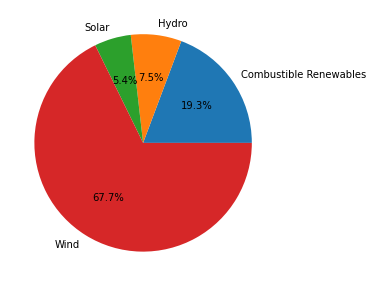

In [93]:
PlotPieChart(df_renewables)

The first graph is a pie chart that shows how much each source of the fuels use in generation of electricity has been distributed. With hydro being the largest source of electricity generated in europe and solar being the least source of electricty generated in europe. 
The second graph shows how the electricity generated has envolve over time. They have been a slow trend over the years but the was a large increase in the in 2022, this was caused because they was a reduction in the electricity generated by non-renewable source because of the Ukraine-Russia crisis

#### EXPLORING ELECTRICITY PRODUCED BY  NON-RENEWABLE SOURCE 

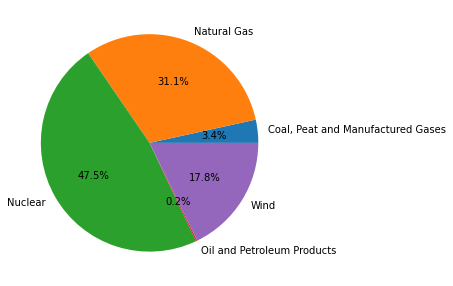

In [94]:
NonRenewables = ['Natural Gas', 'Oil and Petroleum Products', 'Wind', 'Nuclear', 'Coal, Peat and Manufactured Gases']

df_NonRenewables = Electricitydata_DF[Electricitydata_DF['Source of E'].isin(NonRenewables)]
df_NonRenewables = df_NonRenewables[df_NonRenewables['Consumption_Production'] == 'Net Electricity Production']

PlotPieChart(df_NonRenewables)